## HCP individualized connectome prediction evaluation

In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import sklearn
from sklearn.decomposition import PCA
import torch
from torch.utils.data import Dataset, DataLoader
from data.data_utils import *


In [2]:
import importlib
import data.hcp_dataset
import data.dataset_utils 
import data.data_utils
importlib.reload(data.hcp_dataset)
importlib.reload(data.dataset_utils)
importlib.reload(data.data_utils)
from data.hcp_dataset import *
from data.dataset_utils import *
from data.data_utils import *
from data.hcp_dataset import HCP_Base, HCP_Partition

import loss
from loss import *

In [3]:
import models
from models import *
from models import CrossModalPCA, CrossModal_PCA_PLS
importlib.reload(models)
from models import *

import importlib
import eval
import eval_utils
importlib.reload(eval)
from eval import *

importlib.reload(eval_utils)
import eval_utils
from eval_utils import *

importlib.reload(data.hcp_dataset)
importlib.reload(data.dataset_utils)
importlib.reload(data.data_utils)
import data 


importlib.reload(loss)
import loss
from loss import *

## Cross-Modal VAE

Non-linear encoder-decoder VAE: MLP encoder -> Gaussian latent (mu, logvar) -> MLP decoder. Trained with reconstruction (MSE) + beta * KLD. Optional PCA on input (default off).

In [ ]:
HCP_Dataset = HCP_Base(parcellation="Glasser", shuffle_seed=0, source="SC", target="FC",)

# redefine dataset and loaders
HCP_train = HCP_Partition(HCP_Dataset, "train")
HCP_val = HCP_Partition(HCP_Dataset, "val")
HCP_test = HCP_Partition(HCP_Dataset, "test")
HCP_train_loader = DataLoader(HCP_train, batch_size=64, shuffle=True)
HCP_val_loader = DataLoader(HCP_val, batch_size=64, shuffle=True)
HCP_test_loader = DataLoader(HCP_test, batch_size=64, shuffle=True)

/ext3/miniforge3/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/ext3/miniforge3/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [31]:
cross_modal_vae = CrossModalVAE(
    HCP_Dataset,
    latent_dim=32,
    hidden_dims=(512, 256),
    use_pca_encoder=False,
    n_pca_components_encoder=128,
    use_pca_decoder=False,
    n_pca_components_decoder=128,
    dropout=0.0, lr=1e-4, epochs=100,
    loss_fn='vae', beta=0.00,
    l1_l2_tuple=(0.0, 0.0))

CrossModalVAE: use_pca_encoder=False, encoder input dim=64620
CrossModalVAE: use_pca_decoder=False, decoder output dim=64620
CrossModalVAE: latent_dim=32, hidden_dims=[512, 256], d_target=64620


Training on cuda
Model parameters: 66,523,820
Loss: vae | Reg: L1=0.0, L2=0.0
Epochs: 100, LR: 0.0001
Logging every 5 epochs

Epoch    1 | Train MSE: 0.014442, r: 0.8243, r_dm: -0.0000 | Val MSE: 0.015320, r: 0.8230, r_dm: -0.0002 | 0.06s | GPU: 2656MB


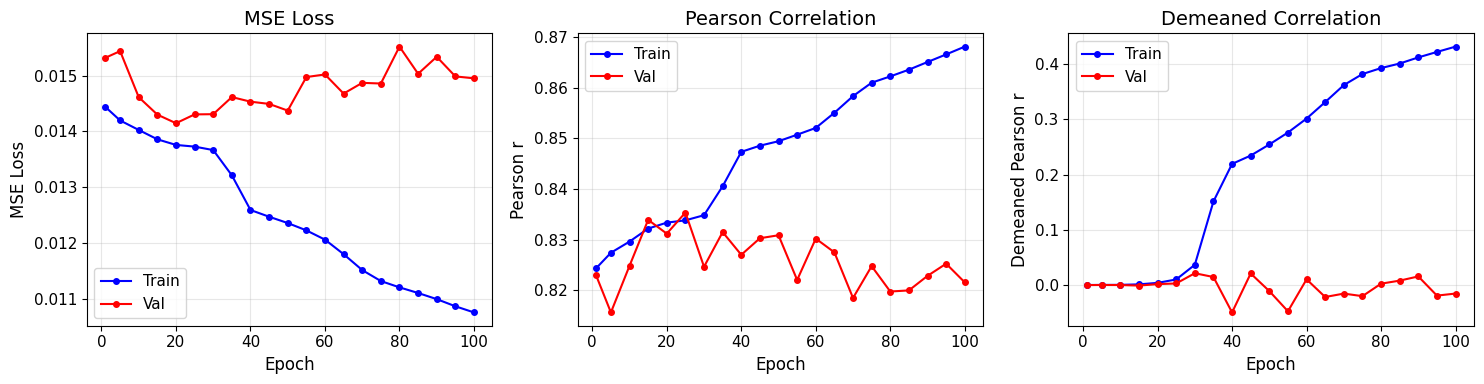

Epoch    5 | Train MSE: 0.014197, r: 0.8274, r_dm: 0.0001 | Val MSE: 0.015441, r: 0.8156, r_dm: -0.0000 | 0.08s | GPU: 2656MB
Epoch   10 | Train MSE: 0.014027, r: 0.8296, r_dm: 0.0003 | Val MSE: 0.014614, r: 0.8248, r_dm: -0.0001 | 0.07s | GPU: 2656MB
Epoch   15 | Train MSE: 0.013859, r: 0.8322, r_dm: 0.0012 | Val MSE: 0.014302, r: 0.8339, r_dm: -0.0011 | 0.06s | GPU: 2656MB
Epoch   20 | Train MSE: 0.013758, r: 0.8334, r_dm: 0.0038 | Val MSE: 0.014148, r: 0.8312, r_dm: 0.0016 | 0.07s | GPU: 2656MB
Epoch   25 | Train MSE: 0.013728, r: 0.8338, r_dm: 0.0100 | Val MSE: 0.014306, r: 0.8354, r_dm: 0.0028 | 0.07s | GPU: 2656MB
Epoch   30 | Train MSE: 0.013666, r: 0.8348, r_dm: 0.0366 | Val MSE: 0.014310, r: 0.8246, r_dm: 0.0213 | 0.06s | GPU: 2656MB
Epoch   35 | Train MSE: 0.013212, r: 0.8406, r_dm: 0.1514 | Val MSE: 0.014617, r: 0.8315, r_dm: 0.0144 | 0.06s | GPU: 2656MB
Epoch   40 | Train MSE: 0.012591, r: 0.8474, r_dm: 0.2194 | Val MSE: 0.014534, r: 0.8270, r_dm: -0.0497 | 0.06s | GPU: 265

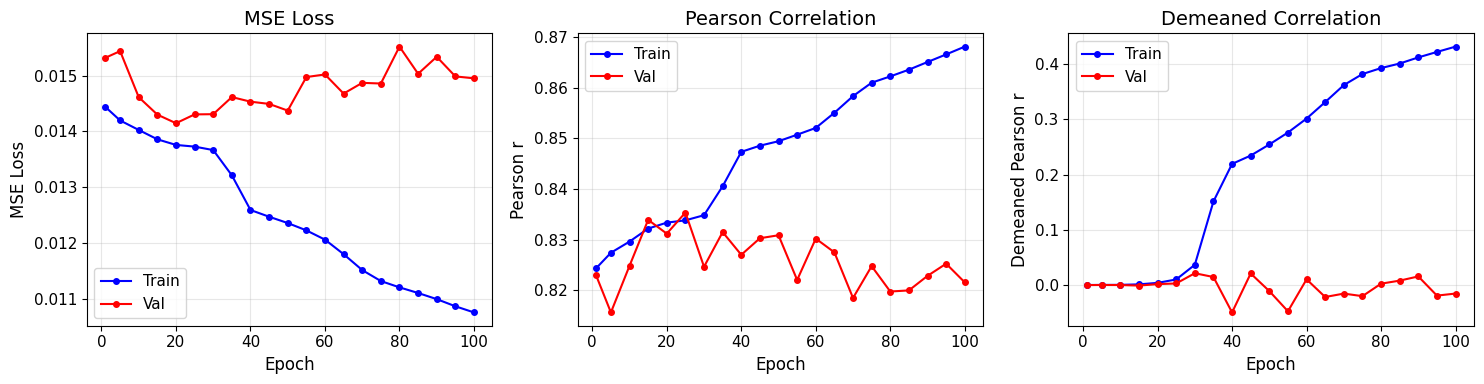

In [32]:
logger_vae = train_model(
    cross_modal_vae,
    HCP_train_loader,
    HCP_val_loader,
    base=HCP_Dataset,
    log_every=5,
)

In [59]:
cross_modal_vae = CrossModalVAE(
    HCP_Dataset,
    latent_dim=32,
    hidden_dims=(512, 256),
    use_pca_encoder=False,
    n_pca_components_encoder=128,
    use_pca_decoder=False,
    n_pca_components_decoder=128,
    dropout=0.1, lr=1e-4, epochs=100,
    loss_fn='vae', beta=.000005,
    l1_l2_tuple=(0.0, 0.0))

CrossModalVAE: use_pca_encoder=False, encoder input dim=64620
CrossModalVAE: use_pca_decoder=False, decoder output dim=64620
CrossModalVAE: latent_dim=32, hidden_dims=[512, 256], d_target=64620


Training on cuda
Model parameters: 66,523,820
Loss: vae | Reg: L1=0.0, L2=0.0
Epochs: 100, LR: 0.0001
Logging every 5 epochs

Epoch    1 | Train MSE: 0.014443, r: 0.8245, r_dm: 0.0000 | Val MSE: 0.015166, r: 0.8202, r_dm: -0.0005 | 0.04s | GPU: 2656MB


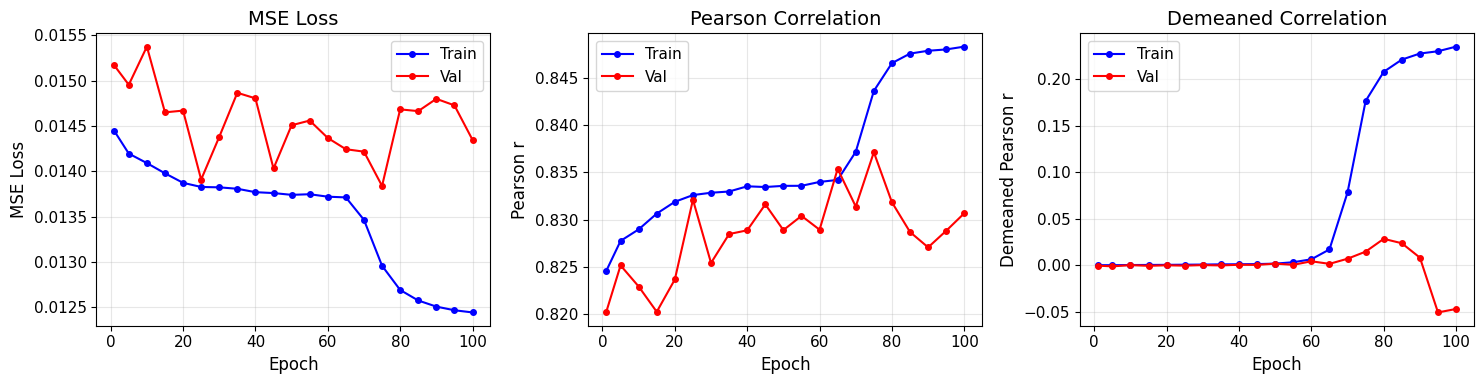

Epoch    5 | Train MSE: 0.014194, r: 0.8277, r_dm: -0.0000 | Val MSE: 0.014954, r: 0.8251, r_dm: -0.0013 | 0.04s | GPU: 2656MB
Epoch   10 | Train MSE: 0.014089, r: 0.8290, r_dm: 0.0002 | Val MSE: 0.015374, r: 0.8229, r_dm: 0.0001 | 0.04s | GPU: 2656MB
Epoch   15 | Train MSE: 0.013977, r: 0.8306, r_dm: 0.0002 | Val MSE: 0.014649, r: 0.8202, r_dm: -0.0007 | 0.04s | GPU: 2656MB
Epoch   20 | Train MSE: 0.013872, r: 0.8319, r_dm: 0.0004 | Val MSE: 0.014668, r: 0.8237, r_dm: -0.0001 | 0.04s | GPU: 2656MB
Epoch   25 | Train MSE: 0.013826, r: 0.8326, r_dm: 0.0005 | Val MSE: 0.013908, r: 0.8321, r_dm: -0.0005 | 0.04s | GPU: 2656MB
Epoch   30 | Train MSE: 0.013822, r: 0.8328, r_dm: 0.0007 | Val MSE: 0.014378, r: 0.8254, r_dm: 0.0001 | 0.04s | GPU: 2656MB
Epoch   35 | Train MSE: 0.013806, r: 0.8330, r_dm: 0.0009 | Val MSE: 0.014865, r: 0.8285, r_dm: -0.0003 | 0.04s | GPU: 2656MB
Epoch   40 | Train MSE: 0.013769, r: 0.8335, r_dm: 0.0010 | Val MSE: 0.014804, r: 0.8289, r_dm: 0.0005 | 0.04s | GPU: 2

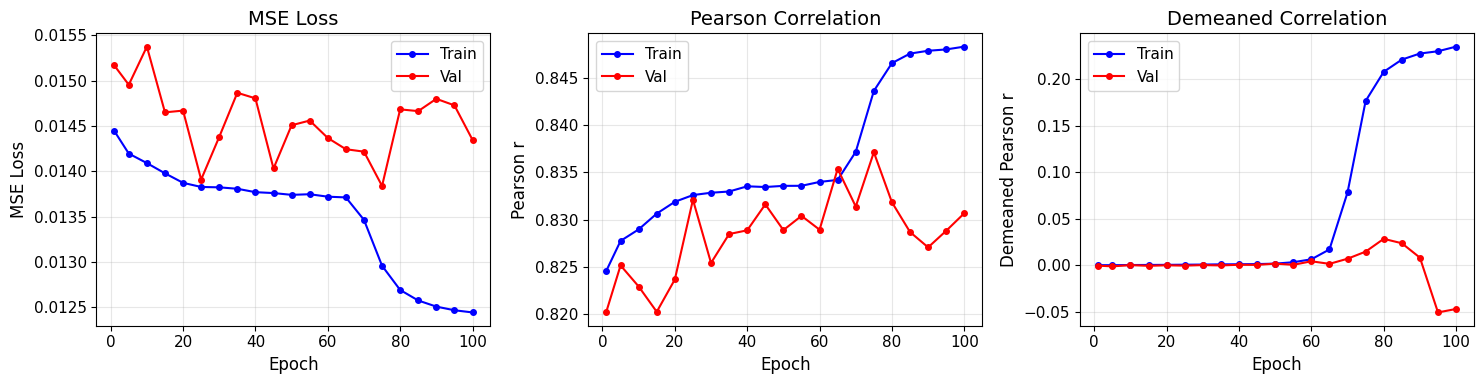

In [60]:
logger_vae = train_model(
    cross_modal_vae,
    HCP_train_loader,
    HCP_val_loader,
    base=HCP_Dataset,
    log_every=5,
)

In [70]:
cross_modal_vae = CrossModalVAE(
    HCP_Dataset,
    latent_dim=32,
    hidden_dims=(512, 256, 128),
    use_pca_encoder=True,
    n_pca_components_encoder=512,
    use_pca_decoder=True,
    n_pca_components_decoder=512,
    dropout=0.2, lr=1e-3, epochs=100,
    loss_fn='vae', beta=.0001,
    l1_l2_tuple=(0.0, 0.0))

CrossModalVAE: use_pca_encoder=True, encoder input dim=512
CrossModalVAE: use_pca_decoder=True, decoder output dim=512
CrossModalVAE: latent_dim=32, hidden_dims=[512, 256, 128], d_target=64620


Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line 219, in get_text_width_height_descent
OSError: [Errno 107] Transport endpoint is not connected
Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line 219, in get_text_width_height_descent
OSError: [Errno 107] Transport endpoint is not connected
Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line 219, in get_text_width_height_descent
OSError: [Errno 107] Transport endpoint is not connected
Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line

Training on cuda
Model parameters: 866,624
Loss: vae | Reg: L1=0.0, L2=0.0
Epochs: 100, LR: 0.001
Logging every 5 epochs

Epoch    1 | Train MSE: 0.013715, r: 0.8340, r_dm: 0.0000 | Val MSE: 0.014461, r: 0.8315, r_dm: 0.0024 | 0.03s | GPU: 2204MB


Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line 192, in draw_text
OSError: [Errno 107] Transport endpoint is not connected
Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line 192, in draw_text
OSError: [Errno 107] Transport endpoint is not connected
Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line 192, in draw_text
OSError: [Errno 107] Transport endpoint is not connected
Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line 192, in draw_text
OSError: [Errno 107] Transport endpoint i

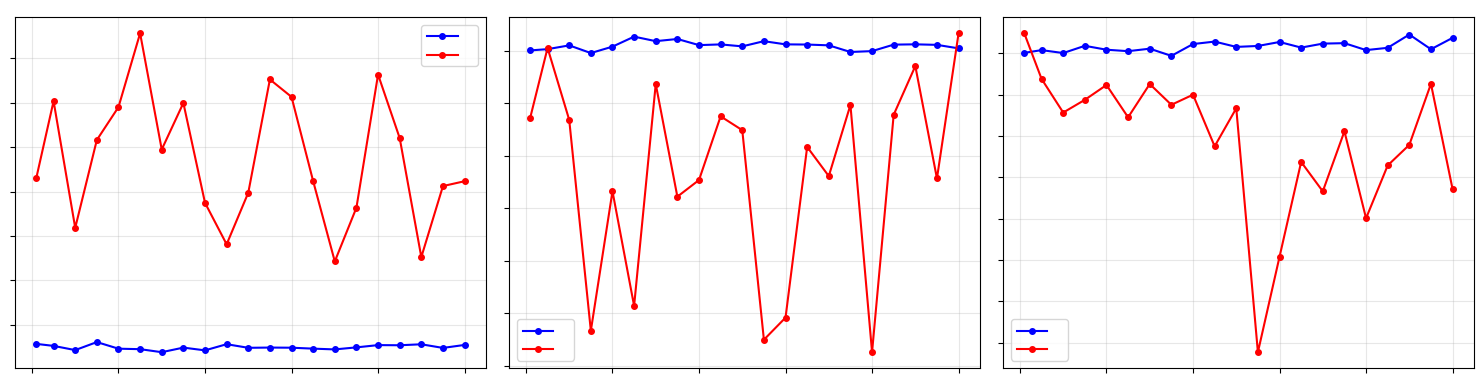

Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line 219, in get_text_width_height_descent
OSError: [Errno 107] Transport endpoint is not connected
Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line 219, in get_text_width_height_descent
OSError: [Errno 107] Transport endpoint is not connected
Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line 219, in get_text_width_height_descent
OSError: [Errno 107] Transport endpoint is not connected
Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line

Epoch    5 | Train MSE: 0.013705, r: 0.8341, r_dm: 0.0004 | Val MSE: 0.014807, r: 0.8341, r_dm: -0.0031 | 0.03s | GPU: 2204MB


Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line 219, in get_text_width_height_descent
OSError: [Errno 107] Transport endpoint is not connected
Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line 219, in get_text_width_height_descent
OSError: [Errno 107] Transport endpoint is not connected
Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line 219, in get_text_width_height_descent
OSError: [Errno 107] Transport endpoint is not connected
Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line

Epoch   10 | Train MSE: 0.013687, r: 0.8342, r_dm: 0.0000 | Val MSE: 0.014237, r: 0.8314, r_dm: -0.0072 | 0.03s | GPU: 2204MB


Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line 219, in get_text_width_height_descent
OSError: [Errno 107] Transport endpoint is not connected
Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line 219, in get_text_width_height_descent
OSError: [Errno 107] Transport endpoint is not connected
Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line 219, in get_text_width_height_descent
OSError: [Errno 107] Transport endpoint is not connected
Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line

Epoch   15 | Train MSE: 0.013723, r: 0.8339, r_dm: 0.0009 | Val MSE: 0.014633, r: 0.8233, r_dm: -0.0056 | 0.03s | GPU: 2204MB


Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line 219, in get_text_width_height_descent
OSError: [Errno 107] Transport endpoint is not connected
Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line 219, in get_text_width_height_descent
OSError: [Errno 107] Transport endpoint is not connected
Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line 219, in get_text_width_height_descent
OSError: [Errno 107] Transport endpoint is not connected
Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line

Epoch   20 | Train MSE: 0.013693, r: 0.8342, r_dm: 0.0004 | Val MSE: 0.014781, r: 0.8287, r_dm: -0.0038 | 0.03s | GPU: 2076MB


Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line 219, in get_text_width_height_descent
OSError: [Errno 107] Transport endpoint is not connected
Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line 219, in get_text_width_height_descent
OSError: [Errno 107] Transport endpoint is not connected
Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line 219, in get_text_width_height_descent
OSError: [Errno 107] Transport endpoint is not connected
Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line

Epoch   25 | Train MSE: 0.013691, r: 0.8345, r_dm: 0.0003 | Val MSE: 0.015113, r: 0.8243, r_dm: -0.0077 | 0.03s | GPU: 2076MB


Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line 219, in get_text_width_height_descent
OSError: [Errno 107] Transport endpoint is not connected
Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line 219, in get_text_width_height_descent
OSError: [Errno 107] Transport endpoint is not connected
Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line 219, in get_text_width_height_descent
OSError: [Errno 107] Transport endpoint is not connected
Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line

Epoch   30 | Train MSE: 0.013677, r: 0.8344, r_dm: 0.0006 | Val MSE: 0.014590, r: 0.8327, r_dm: -0.0037 | 0.03s | GPU: 2076MB


Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line 219, in get_text_width_height_descent
OSError: [Errno 107] Transport endpoint is not connected
Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line 219, in get_text_width_height_descent
OSError: [Errno 107] Transport endpoint is not connected
Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line 219, in get_text_width_height_descent
OSError: [Errno 107] Transport endpoint is not connected
Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line

Epoch   35 | Train MSE: 0.013698, r: 0.8345, r_dm: -0.0003 | Val MSE: 0.014799, r: 0.8284, r_dm: -0.0062 | 0.03s | GPU: 2076MB


Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line 219, in get_text_width_height_descent
OSError: [Errno 107] Transport endpoint is not connected
Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line 219, in get_text_width_height_descent
OSError: [Errno 107] Transport endpoint is not connected
Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line 219, in get_text_width_height_descent
OSError: [Errno 107] Transport endpoint is not connected
Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line

Epoch   40 | Train MSE: 0.013685, r: 0.8342, r_dm: 0.0011 | Val MSE: 0.014350, r: 0.8291, r_dm: -0.0050 | 0.03s | GPU: 2076MB


Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line 219, in get_text_width_height_descent
OSError: [Errno 107] Transport endpoint is not connected
Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line 219, in get_text_width_height_descent
OSError: [Errno 107] Transport endpoint is not connected
Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line 219, in get_text_width_height_descent
OSError: [Errno 107] Transport endpoint is not connected
Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line

Epoch   45 | Train MSE: 0.013713, r: 0.8342, r_dm: 0.0014 | Val MSE: 0.014163, r: 0.8315, r_dm: -0.0112 | 0.03s | GPU: 2076MB


Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line 219, in get_text_width_height_descent
OSError: [Errno 107] Transport endpoint is not connected
Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line 219, in get_text_width_height_descent
OSError: [Errno 107] Transport endpoint is not connected
Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line 219, in get_text_width_height_descent
OSError: [Errno 107] Transport endpoint is not connected
Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line

Epoch   50 | Train MSE: 0.013697, r: 0.8342, r_dm: 0.0008 | Val MSE: 0.014395, r: 0.8310, r_dm: -0.0067 | 0.03s | GPU: 2076MB


Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line 219, in get_text_width_height_descent
OSError: [Errno 107] Transport endpoint is not connected
Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line 219, in get_text_width_height_descent
OSError: [Errno 107] Transport endpoint is not connected
Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line 219, in get_text_width_height_descent
OSError: [Errno 107] Transport endpoint is not connected
Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line

Epoch   55 | Train MSE: 0.013698, r: 0.8344, r_dm: 0.0009 | Val MSE: 0.014905, r: 0.8230, r_dm: -0.0361 | 0.03s | GPU: 2076MB


Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line 219, in get_text_width_height_descent
OSError: [Errno 107] Transport endpoint is not connected
Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line 219, in get_text_width_height_descent
OSError: [Errno 107] Transport endpoint is not connected
Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line 219, in get_text_width_height_descent
OSError: [Errno 107] Transport endpoint is not connected
Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line

Epoch   60 | Train MSE: 0.013697, r: 0.8342, r_dm: 0.0014 | Val MSE: 0.014826, r: 0.8238, r_dm: -0.0246 | 0.03s | GPU: 2076MB


Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line 219, in get_text_width_height_descent
OSError: [Errno 107] Transport endpoint is not connected
Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line 219, in get_text_width_height_descent
OSError: [Errno 107] Transport endpoint is not connected
Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line 219, in get_text_width_height_descent
OSError: [Errno 107] Transport endpoint is not connected
Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line

Epoch   65 | Train MSE: 0.013693, r: 0.8342, r_dm: 0.0007 | Val MSE: 0.014447, r: 0.8303, r_dm: -0.0131 | 0.03s | GPU: 2076MB


Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line 219, in get_text_width_height_descent
OSError: [Errno 107] Transport endpoint is not connected
Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line 219, in get_text_width_height_descent
OSError: [Errno 107] Transport endpoint is not connected
Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line 219, in get_text_width_height_descent
OSError: [Errno 107] Transport endpoint is not connected
Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line

Epoch   70 | Train MSE: 0.013690, r: 0.8342, r_dm: 0.0012 | Val MSE: 0.014086, r: 0.8292, r_dm: -0.0167 | 0.03s | GPU: 2076MB


Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line 219, in get_text_width_height_descent
OSError: [Errno 107] Transport endpoint is not connected
Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line 219, in get_text_width_height_descent
OSError: [Errno 107] Transport endpoint is not connected
Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line 219, in get_text_width_height_descent
OSError: [Errno 107] Transport endpoint is not connected
Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line

Epoch   75 | Train MSE: 0.013699, r: 0.8340, r_dm: 0.0012 | Val MSE: 0.014328, r: 0.8319, r_dm: -0.0094 | 0.03s | GPU: 2076MB


Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line 219, in get_text_width_height_descent
OSError: [Errno 107] Transport endpoint is not connected
Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line 219, in get_text_width_height_descent
OSError: [Errno 107] Transport endpoint is not connected
Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line 219, in get_text_width_height_descent
OSError: [Errno 107] Transport endpoint is not connected
Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line

Epoch   80 | Train MSE: 0.013709, r: 0.8340, r_dm: 0.0004 | Val MSE: 0.014927, r: 0.8225, r_dm: -0.0200 | 0.03s | GPU: 2076MB


Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line 219, in get_text_width_height_descent
OSError: [Errno 107] Transport endpoint is not connected
Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line 219, in get_text_width_height_descent
OSError: [Errno 107] Transport endpoint is not connected
Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line 219, in get_text_width_height_descent
OSError: [Errno 107] Transport endpoint is not connected
Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line

Epoch   85 | Train MSE: 0.013708, r: 0.8342, r_dm: 0.0007 | Val MSE: 0.014641, r: 0.8316, r_dm: -0.0136 | 0.03s | GPU: 2076MB


Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line 219, in get_text_width_height_descent
OSError: [Errno 107] Transport endpoint is not connected
Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line 219, in get_text_width_height_descent
OSError: [Errno 107] Transport endpoint is not connected
Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line 219, in get_text_width_height_descent
OSError: [Errno 107] Transport endpoint is not connected
Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line

Epoch   90 | Train MSE: 0.013713, r: 0.8342, r_dm: 0.0023 | Val MSE: 0.014105, r: 0.8334, r_dm: -0.0111 | 0.03s | GPU: 2076MB


Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line 219, in get_text_width_height_descent
OSError: [Errno 107] Transport endpoint is not connected
Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line 219, in get_text_width_height_descent
OSError: [Errno 107] Transport endpoint is not connected
Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line 219, in get_text_width_height_descent
OSError: [Errno 107] Transport endpoint is not connected
Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line

Epoch   95 | Train MSE: 0.013696, r: 0.8342, r_dm: 0.0005 | Val MSE: 0.014425, r: 0.8291, r_dm: -0.0037 | 0.03s | GPU: 2076MB


Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line 219, in get_text_width_height_descent
OSError: [Errno 107] Transport endpoint is not connected
Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line 219, in get_text_width_height_descent
OSError: [Errno 107] Transport endpoint is not connected
Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line 219, in get_text_width_height_descent
OSError: [Errno 107] Transport endpoint is not connected
Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line

Epoch  100 | Train MSE: 0.013710, r: 0.8341, r_dm: 0.0019 | Val MSE: 0.014447, r: 0.8347, r_dm: -0.0164 | 0.03s | GPU: 2076MB


Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line 219, in get_text_width_height_descent
OSError: [Errno 107] Transport endpoint is not connected
Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line 219, in get_text_width_height_descent
OSError: [Errno 107] Transport endpoint is not connected
Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line 219, in get_text_width_height_descent
OSError: [Errno 107] Transport endpoint is not connected
Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line


Training complete!


Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line 192, in draw_text
OSError: [Errno 107] Transport endpoint is not connected
Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line 192, in draw_text
OSError: [Errno 107] Transport endpoint is not connected
Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line 192, in draw_text
OSError: [Errno 107] Transport endpoint is not connected
Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "/ext3/miniforge3/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line 192, in draw_text
OSError: [Errno 107] Transport endpoint i

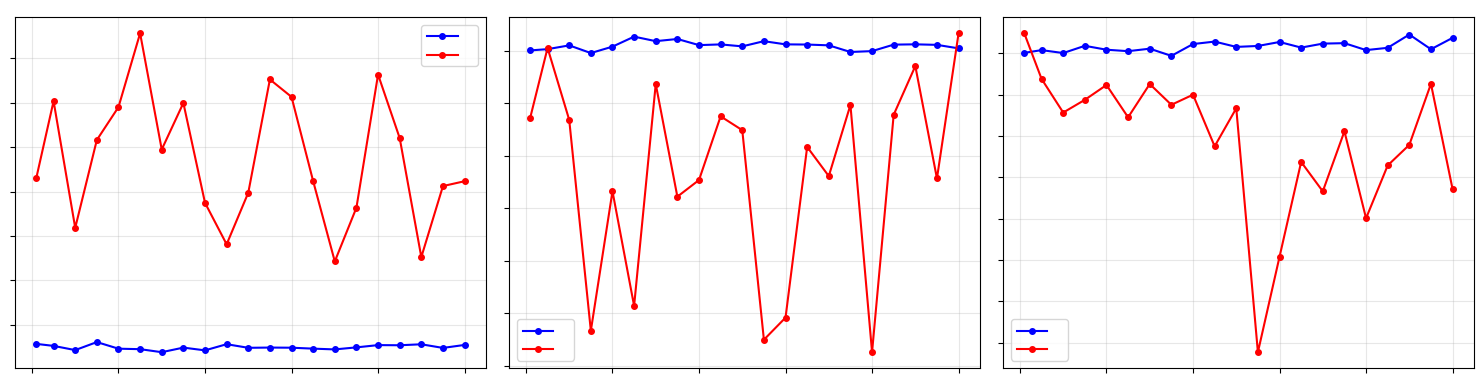

In [71]:
logger_vae = train_model(
    cross_modal_vae,
    HCP_train_loader,
    HCP_val_loader,
    base=HCP_Dataset,
    log_every=5,
)

In [23]:
# generate predictions
device = cross_modal_vae.device if hasattr(cross_modal_vae, 'device') else torch.device("cpu")
train_preds, train_targets = predict_from_loader(cross_modal_vae, HCP_train_loader, device=device)
val_preds, val_targets = predict_from_loader(cross_modal_vae, HCP_val_loader, device=device)
test_preds, test_targets = predict_from_loader(cross_modal_vae, HCP_test_loader, device=device) 

In [24]:
train_evaluator = Evaluator(train_preds, train_targets, HCP_train, HCP_Dataset)
val_evaluator = Evaluator(val_preds, val_targets, HCP_val, HCP_Dataset)
test_evaluator = Evaluator(test_preds, test_targets, HCP_test, HCP_Dataset)

/scratch/asr655/neuroinformatics/Conn2Conn/eval.py:451: RuntimeWarning: invalid value encountered in divide
  cci_scaled = (cci - np.nanmin(cci)) / (np.nanmax(cci) - np.nanmin(cci))


returned noise_preds [[ 0.10335524  0.27345097  0.79338528 ...  0.07845213  0.10779611
   0.357242  ]
 [ 0.19199795  0.47149244  0.6724817  ... -0.13729254 -0.09331816
   0.66529671]
 [ 0.3631452   0.63926439  0.88444674 ... -0.01370379  0.12942167
   0.399605  ]
 ...
 [-0.0823811   0.82869695  1.07752755 ... -0.06908565 -0.0044076
   0.4032794 ]
 [ 0.12395494  0.68586341  0.6269889  ... -0.12566296  0.16673283
   0.53747603]
 [ 0.05569954  0.62698798  0.69579933 ... -0.09271123  0.09947311
   0.36341408]]
returned noise_preds [[ 0.10335524  0.27345097  0.79338528 ...  0.07845213  0.10779611
   0.357242  ]
 [ 0.19199795  0.47149244  0.6724817  ... -0.13729254 -0.09331816
   0.66529671]
 [ 0.3631452   0.63926439  0.88444674 ... -0.01370379  0.12942167
   0.399605  ]
 ...
 [-0.0823811   0.82869695  1.07752755 ... -0.06908565 -0.0044076
   0.4032794 ]
 [ 0.12395494  0.68586341  0.6269889  ... -0.12566296  0.16673283
   0.53747603]
 [ 0.05569954  0.62698798  0.69579933 ... -0.09271123  0.0

/ext3/miniforge3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:579: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


  n=17: pFC=100.0%, Noise=5.8%, Permute=100.0%
  n=22: pFC=100.0%, Noise=4.4%, Permute=100.0%
  n=27: pFC=100.0%, Noise=3.7%, Permute=100.0%
  n=32: pFC=100.0%, Noise=3.4%, Permute=100.0%
  n=37: pFC=100.0%, Noise=3.0%, Permute=100.0%
  n=42: pFC=100.0%, Noise=2.6%, Permute=100.0%
  n=47: pFC=100.0%, Noise=2.3%, Permute=100.0%
  n=52: pFC=100.0%, Noise=2.2%, Permute=100.0%
  n=57: pFC=100.0%, Noise=1.9%, Permute=100.0%
  n=62: pFC=100.0%, Noise=1.7%, Permute=100.0%
  n=67: pFC=100.0%, Noise=1.7%, Permute=100.0%
  n=72: pFC=100.0%, Noise=1.5%, Permute=100.0%
  n=77: pFC=100.0%, Noise=1.4%, Permute=100.0%
  n=82: pFC=100.0%, Noise=1.3%, Permute=100.0%
  n=87: pFC=100.0%, Noise=1.2%, Permute=100.0%
  n=92: pFC=100.0%, Noise=1.2%, Permute=100.0%
  n=97: pFC=100.0%, Noise=1.1%, Permute=100.0%


ValueError: `ps` must include only numbers between 0 and 1.

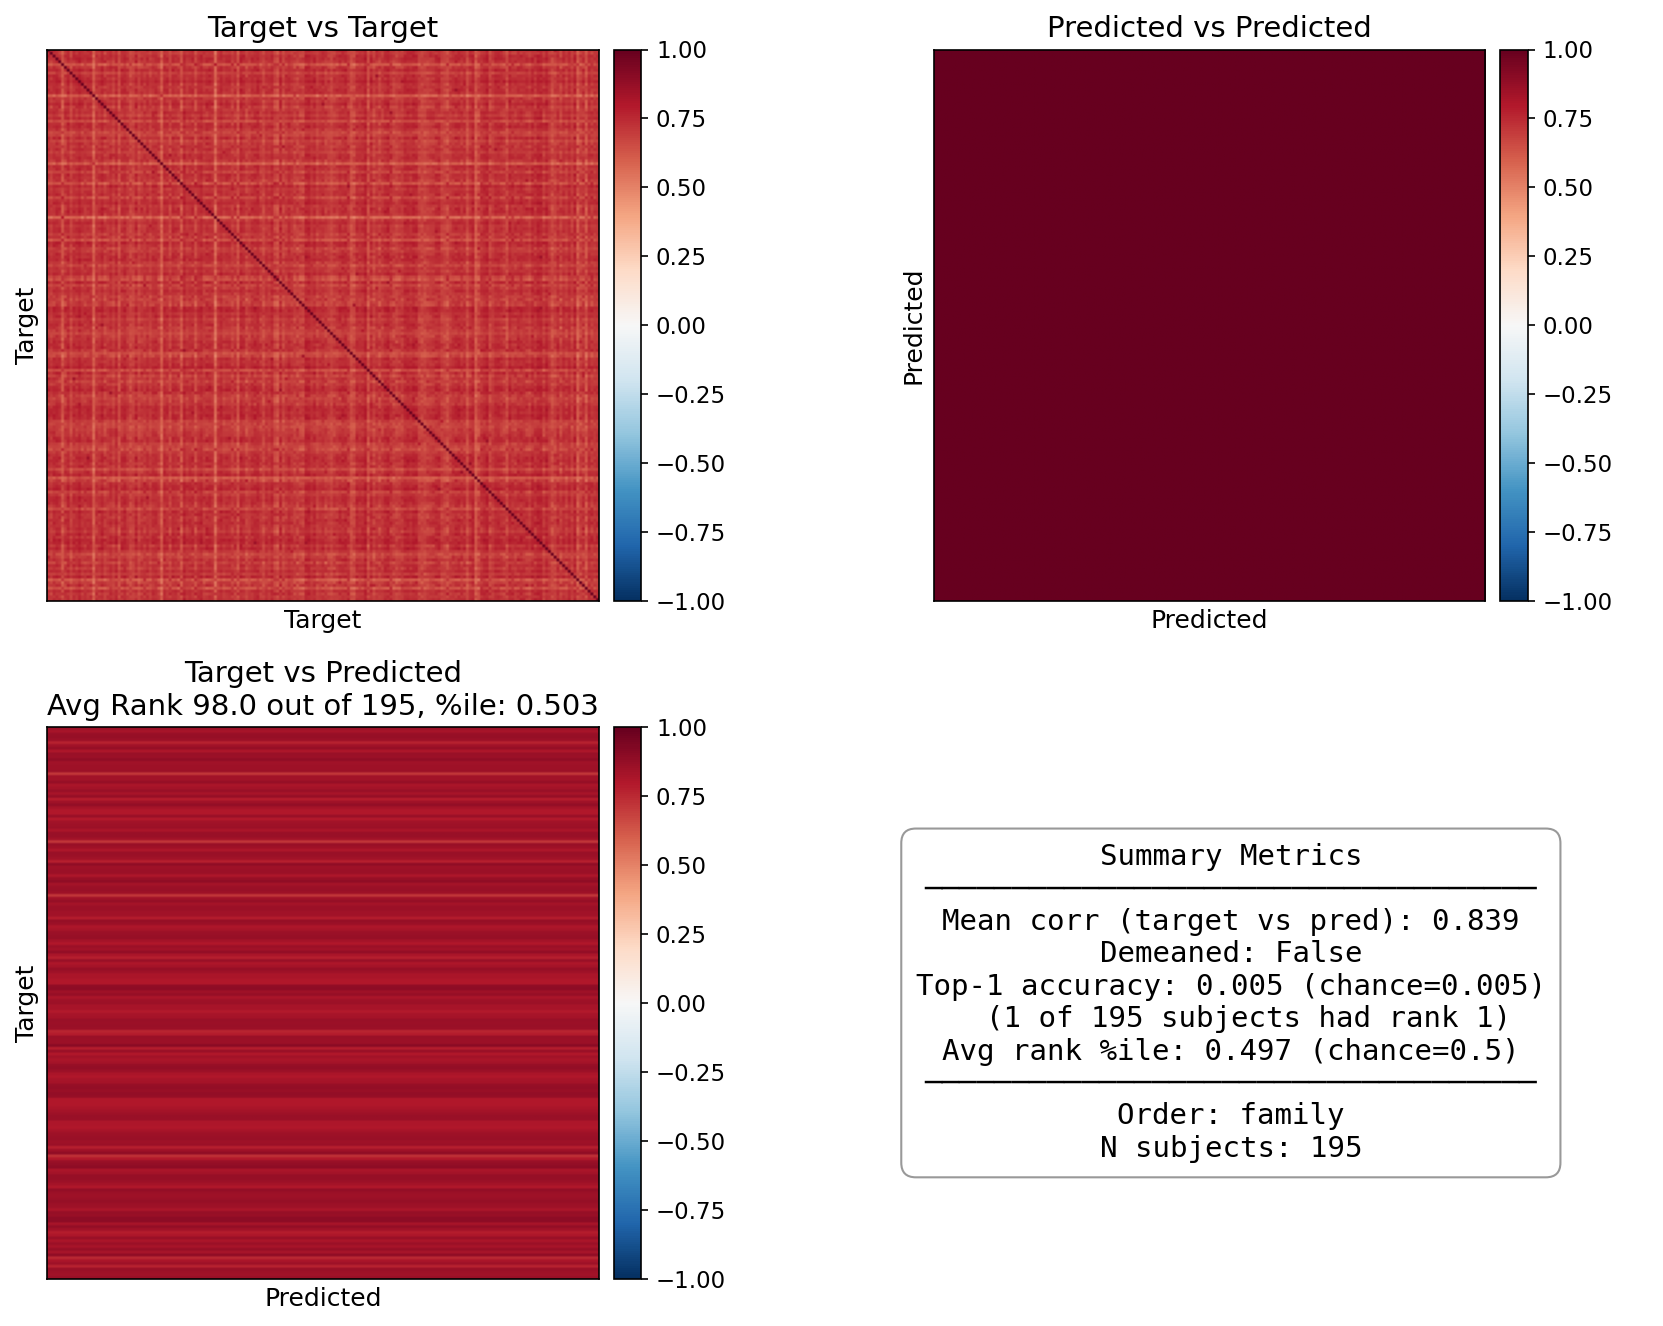

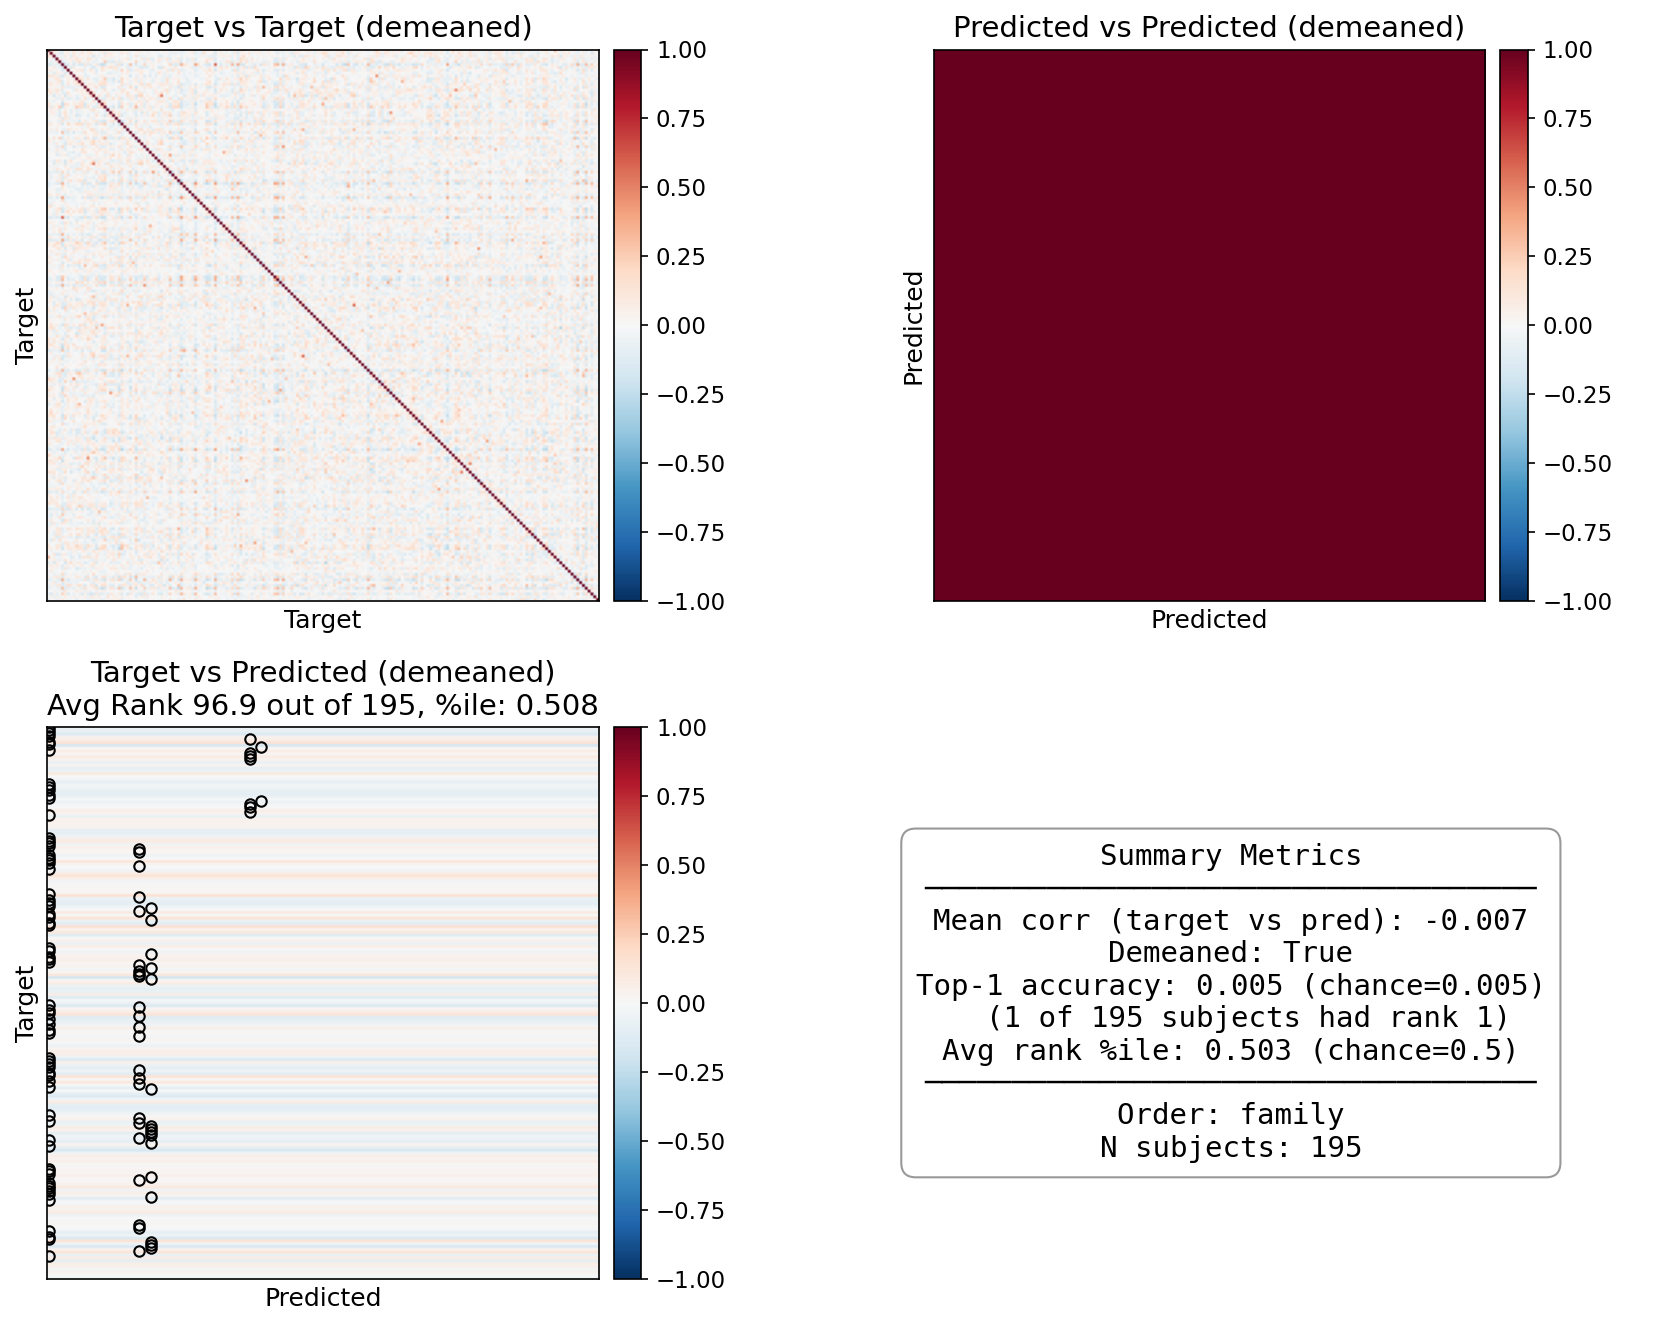

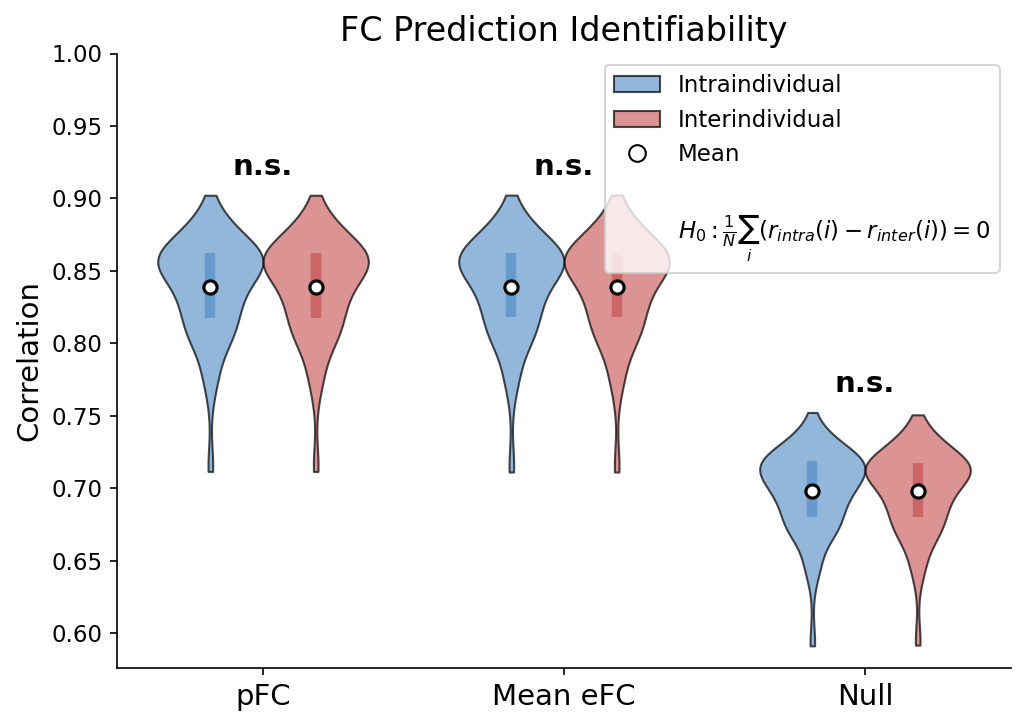

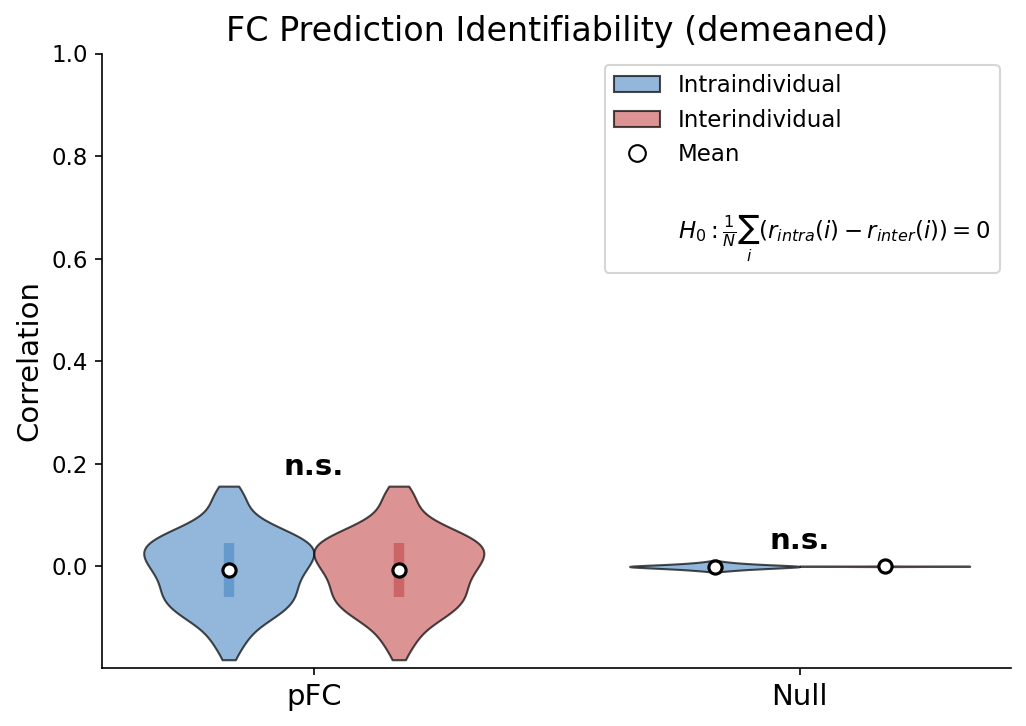

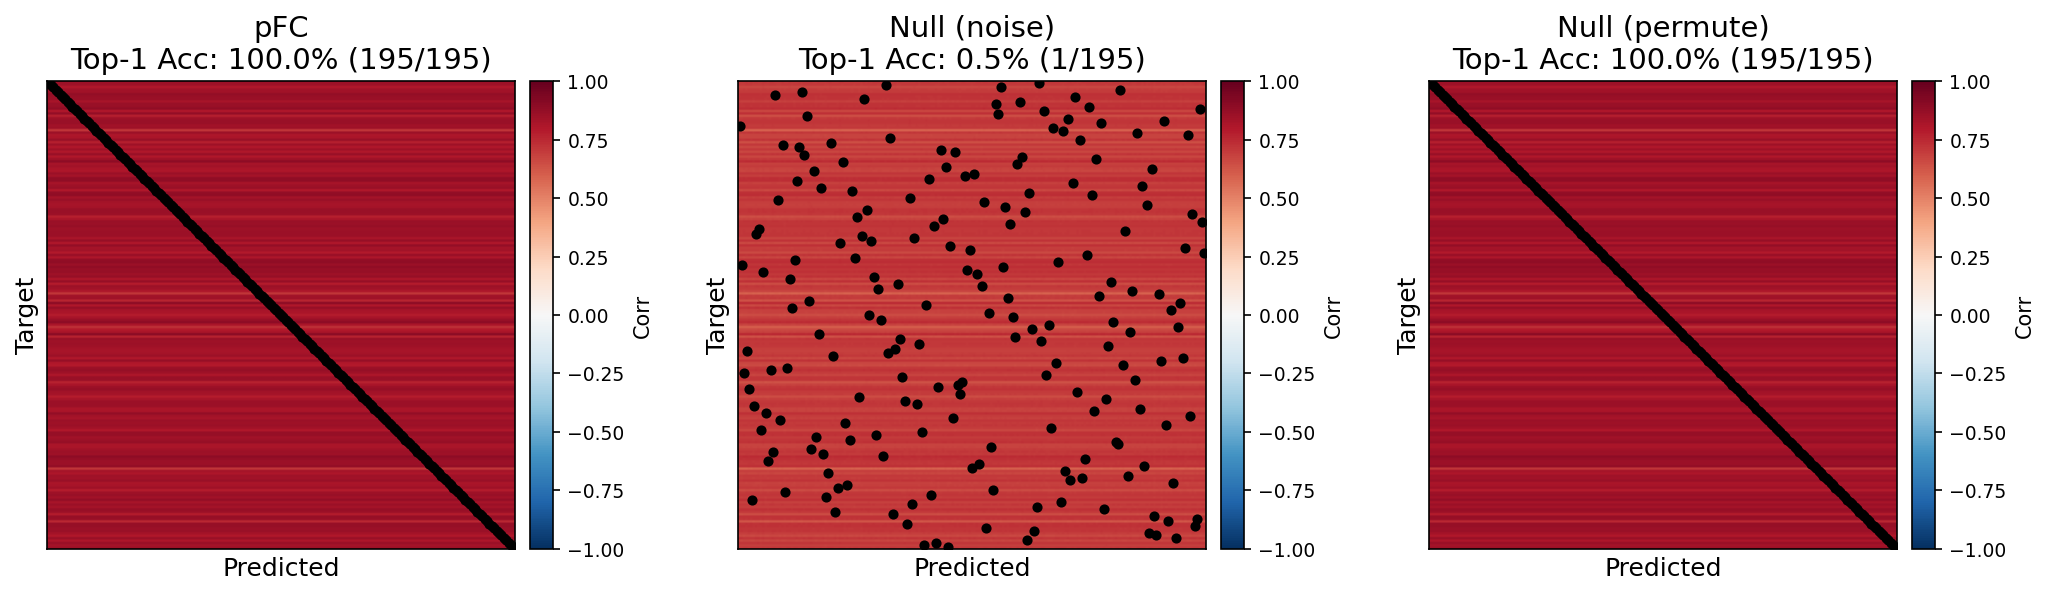

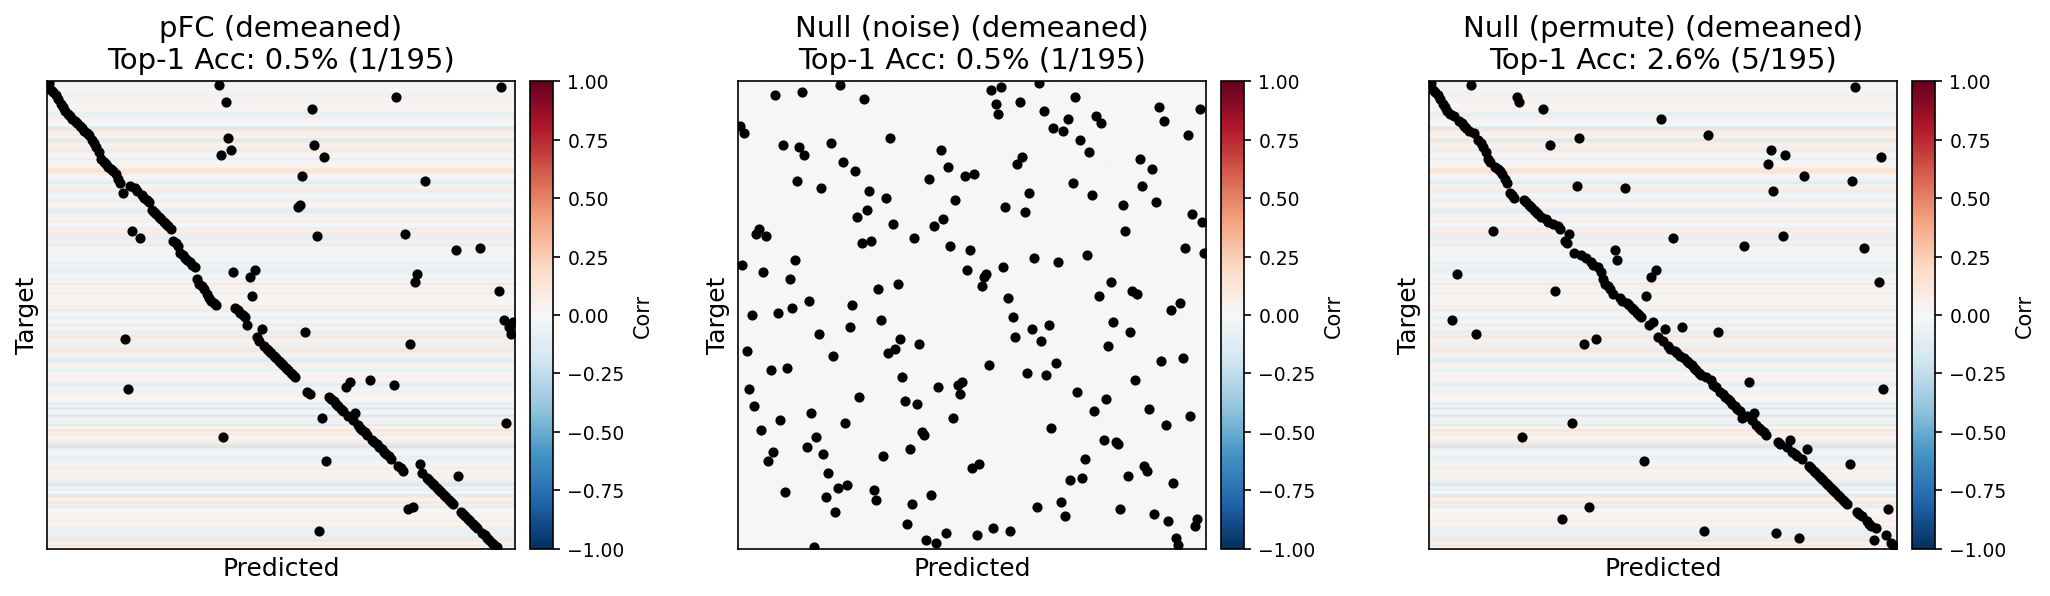

In [25]:
test_evaluator.analyze_results(verbose=True, filepath='/scratch/asr655/neuroinformatics/Conn2Conn/results/cross_PCA_PLS_learnable_results')

### Cross-modal (SC-to-FC) Krakencoder model

In [36]:
from scipy.io import loadmat

# --- Load predicted .mat and set source parcellation/conn type ---
parcellation = 'Glasser'
conn_type = 'SC' # Source conn type

### TRUE DATA
mat = loadmat('./krakencoder/example_data/mydata_Glasser_inputs.mat')
conndata_Glasser = {}
for ckey in ['FCcorr_Glasser_hpf', 'SCifod2act_Glasser_volnorm']:
    cell_array = mat[ckey]['data'][0][0][0]  # shape: (1, 957), each cell is 360x360
    nsubj = cell_array.shape[0]
    arr3d = np.stack([cell_array[i] for i in range(nsubj)], axis=0)  # (957, 360, 360)

    # Flatten each subject's matrix into upper triangle (excluding diagonal) using square2tri
    data_tri = np.stack([square2tri(arr3d[i], k=1) for i in range(arr3d.shape[0])], axis=0)  # (957, n_edges)
    conndata_Glasser[ckey] = {'data': data_tri}
    print("conndata[%r]['data'] shape:" % ckey, conndata_Glasser[ckey]['data'].shape)

### KRAKEN PREDICTIONS
matfile = loadmat(f"./krakencoder/example_data/mydata_kraken_source_{parcellation}.{conn_type}.mat")
outputtypes = matfile['outputtypes']
predicted_alltypes = matfile['predicted_alltypes']

headers = [
    'FCcorr_Glasser_hpf',
    'FCcorr_4S456Parcels_hpf',
    'SCifod2act_Glasser_volnorm',
    'SCifod2act_4S456Parcels_volnorm'
]

preds = predicted_alltypes[0][0][0][0][0]

# Grab Glasser predictions
predicted_alltypes_Glasser = {
    'FCcorr_Glasser_hpf':    {'data': np.array(preds[1])},
    'SCifod2act_Glasser_volnorm': {'data': np.array(preds[3])}
}

kraken_preds = predicted_alltypes_Glasser['FCcorr_Glasser_hpf']['data']
kraken_train_preds = kraken_preds[HCP_Dataset.trainvaltest_partition_indices['train']]
kraken_val_preds = kraken_preds[HCP_Dataset.trainvaltest_partition_indices['val']]
kraken_test_preds = kraken_preds[HCP_Dataset.trainvaltest_partition_indices['test']]

conndata['FCcorr_Glasser_hpf']['data'] shape: (957, 64620)
conndata['SCifod2act_Glasser_volnorm']['data'] shape: (957, 64620)


In [37]:
train_evaluator = Evaluator(kraken_train_preds, train_targets, HCP_train, HCP_Dataset)
val_evaluator = Evaluator(kraken_val_preds, val_targets, HCP_val, HCP_Dataset)
test_evaluator = Evaluator(kraken_test_preds, test_targets, HCP_test, HCP_Dataset)

In [38]:
test_evaluator.analyze_results(verbose=True, filepath='/scratch/asr655/neuroinformatics/Conn2Conn/results/kraken_results')

returned noise_preds [[ 0.10335524  0.27345097  0.79338528 ...  0.07845213  0.10779611
   0.357242  ]
 [ 0.19199795  0.47149244  0.6724817  ... -0.13729254 -0.09331816
   0.66529671]
 [ 0.3631452   0.63926439  0.88444674 ... -0.01370379  0.12942167
   0.399605  ]
 ...
 [-0.0823811   0.82869695  1.07752755 ... -0.06908565 -0.0044076
   0.4032794 ]
 [ 0.12395494  0.68586341  0.6269889  ... -0.12566296  0.16673283
   0.53747603]
 [ 0.05569954  0.62698798  0.69579933 ... -0.09271123  0.09947311
   0.36341408]]
returned noise_preds [[ 0.10335524  0.27345097  0.79338528 ...  0.07845213  0.10779611
   0.357242  ]
 [ 0.19199795  0.47149244  0.6724817  ... -0.13729254 -0.09331816
   0.66529671]
 [ 0.3631452   0.63926439  0.88444674 ... -0.01370379  0.12942167
   0.399605  ]
 ...
 [-0.0823811   0.82869695  1.07752755 ... -0.06908565 -0.0044076
   0.4032794 ]
 [ 0.12395494  0.68586341  0.6269889  ... -0.12566296  0.16673283
   0.53747603]
 [ 0.05569954  0.62698798  0.69579933 ... -0.09271123  0.0

{'partition': 'test',
 'n_subjects': 195,
 'base_metrics': {'mse': np.float32(0.013571207),
  'r2': np.float32(-0.031421516),
  'pearson': np.float32(0.8358165),
  'demeaned_pearson': np.float64(0.08288907061393067),
  'avg_rank': np.float64(0.7422485207100591),
  'top1_acc': np.float64(0.041025641025641026)},
 'heatmaps_raw': {'mean_corr': np.float32(0.8358165),
  'demeaned': False,
  'top1_acc': np.float64(0.041025641025641026),
  'avg_rank_percentile': np.float64(0.737120315581854),
  'chance_top1': 0.005128205128205128,
  'chance_avgrank': 0.5,
  'ranklist': [28,
   39,
   81,
   47,
   5,
   94,
   143,
   30,
   150,
   56,
   7,
   32,
   7,
   110,
   2,
   167,
   186,
   58,
   75,
   1,
   21,
   1,
   8,
   97,
   24,
   183,
   55,
   14,
   41,
   163,
   8,
   45,
   173,
   2,
   128,
   7,
   20,
   5,
   37,
   93,
   2,
   6,
   6,
   73,
   26,
   31,
   2,
   123,
   159,
   105,
   103,
   127,
   32,
   45,
   10,
   11,
   22,
   6,
   38,
   4,
   37,
   25,
  

### PCA (FC-to-FC) Autoencoder model (256 components)

In [39]:
### PCA (FC-to-FC) Autoencoder model (256 components)
HCP_Dataset = HCP_Base(parcellation="Glasser", shuffle_seed=0, source="FC", target="FC")

# Redefine dataset and loaders
HCP_train = HCP_Partition(HCP_Dataset, "train")
HCP_val = HCP_Partition(HCP_Dataset, "val")
HCP_test = HCP_Partition(HCP_Dataset, "test")
HCP_train_loader = DataLoader(HCP_train, batch_size=256, shuffle=False)
HCP_val_loader = DataLoader(HCP_val, batch_size=256, shuffle=False)
HCP_test_loader = DataLoader(HCP_test, batch_size=256, shuffle=False)

# initialize model
cross_modal_pca_model = CrossModalPCA(HCP_Dataset, num_components=512)

# generate predictions
device = cross_modal_pca_model.device if hasattr(cross_modal_pca_model, 'device') else torch.device("cpu")
train_preds, train_targets = predict_from_loader(cross_modal_pca_model, HCP_train_loader, device=device)
val_preds, val_targets = predict_from_loader(cross_modal_pca_model, HCP_val_loader, device=device)
test_preds, test_targets = predict_from_loader(cross_modal_pca_model, HCP_test_loader, device=device)

Source mean shape: torch.Size([64620])
Source loadings shape: torch.Size([64620, 683])
Target mean shape: torch.Size([64620])
Target loadings shape: torch.Size([64620, 683])


In [40]:
train_evaluator = Evaluator(train_preds, train_targets, HCP_train, HCP_Dataset)
val_evaluator = Evaluator(val_preds, val_targets, HCP_val, HCP_Dataset)
test_evaluator = Evaluator(test_preds, test_targets, HCP_test, HCP_Dataset)

In [41]:
test_evaluator.analyze_results(verbose=True, filepath='/scratch/asr655/neuroinformatics/Conn2Conn/results/self_PCA_results')

returned noise_preds [[ 0.10335524  0.27345097  0.79338528 ...  0.07845213  0.10779611
   0.357242  ]
 [ 0.19199795  0.47149244  0.6724817  ... -0.13729254 -0.09331816
   0.66529671]
 [ 0.3631452   0.63926439  0.88444674 ... -0.01370379  0.12942167
   0.399605  ]
 ...
 [-0.0823811   0.82869695  1.07752755 ... -0.06908565 -0.0044076
   0.4032794 ]
 [ 0.12395494  0.68586341  0.6269889  ... -0.12566296  0.16673283
   0.53747603]
 [ 0.05569954  0.62698798  0.69579933 ... -0.09271123  0.09947311
   0.36341408]]
returned noise_preds [[ 0.10335524  0.27345097  0.79338528 ...  0.07845213  0.10779611
   0.357242  ]
 [ 0.19199795  0.47149244  0.6724817  ... -0.13729254 -0.09331816
   0.66529671]
 [ 0.3631452   0.63926439  0.88444674 ... -0.01370379  0.12942167
   0.399605  ]
 ...
 [-0.0823811   0.82869695  1.07752755 ... -0.06908565 -0.0044076
   0.4032794 ]
 [ 0.12395494  0.68586341  0.6269889  ... -0.12566296  0.16673283
   0.53747603]
 [ 0.05569954  0.62698798  0.69579933 ... -0.09271123  0.0

/ext3/miniforge3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:579: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


  n=17: pFC=100.0%, Noise=7.8%, Permute=5.6%
  n=22: pFC=100.0%, Noise=6.4%, Permute=4.8%
  n=27: pFC=100.0%, Noise=5.1%, Permute=3.7%
  n=32: pFC=100.0%, Noise=4.3%, Permute=3.2%
  n=37: pFC=100.0%, Noise=4.0%, Permute=2.7%
  n=42: pFC=100.0%, Noise=3.6%, Permute=2.5%
  n=47: pFC=100.0%, Noise=3.2%, Permute=2.2%
  n=52: pFC=100.0%, Noise=3.1%, Permute=2.0%
  n=57: pFC=100.0%, Noise=2.8%, Permute=1.8%
  n=62: pFC=100.0%, Noise=2.5%, Permute=1.6%
  n=67: pFC=100.0%, Noise=2.4%, Permute=1.5%
  n=72: pFC=100.0%, Noise=2.3%, Permute=1.4%
  n=77: pFC=100.0%, Noise=2.3%, Permute=1.3%
  n=82: pFC=100.0%, Noise=2.1%, Permute=1.1%
  n=87: pFC=100.0%, Noise=2.0%, Permute=1.2%
  n=92: pFC=100.0%, Noise=2.0%, Permute=1.1%
  n=97: pFC=100.0%, Noise=1.8%, Permute=1.0%
Running Hungarian matching analysis for n=2 to 100 (step=5) with M=1000 iterations...
  n=2: pFC=100.0%, Noise=52.8%, Permute=47.1%
  n=7: pFC=100.0%, Noise=17.4%, Permute=14.0%
  n=12: pFC=100.0%, Noise=11.1%, Permute=8.5%
  n=17: pFC

/ext3/miniforge3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:579: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


  n=22: pFC=100.0%, Noise=6.5%, Permute=4.8%
  n=27: pFC=100.0%, Noise=5.3%, Permute=3.7%
  n=32: pFC=100.0%, Noise=4.5%, Permute=3.2%
  n=37: pFC=100.0%, Noise=4.3%, Permute=2.7%
  n=42: pFC=100.0%, Noise=3.8%, Permute=2.5%
  n=47: pFC=100.0%, Noise=3.5%, Permute=2.2%
  n=52: pFC=100.0%, Noise=3.4%, Permute=2.0%
  n=57: pFC=100.0%, Noise=3.0%, Permute=1.8%
  n=62: pFC=100.0%, Noise=2.8%, Permute=1.6%
  n=67: pFC=100.0%, Noise=2.7%, Permute=1.5%
  n=72: pFC=100.0%, Noise=2.5%, Permute=1.4%
  n=77: pFC=100.0%, Noise=2.5%, Permute=1.3%
  n=82: pFC=100.0%, Noise=2.3%, Permute=1.1%
  n=87: pFC=100.0%, Noise=2.2%, Permute=1.2%
  n=92: pFC=100.0%, Noise=2.1%, Permute=1.1%
  n=97: pFC=100.0%, Noise=2.0%, Permute=1.0%
Markdown report saved to: /scratch/asr655/neuroinformatics/Conn2Conn/results/self_PCA_results.md
Figures saved to: /scratch/asr655/neuroinformatics/Conn2Conn/results/self_PCA_results_plots/


{'partition': 'test',
 'n_subjects': 195,
 'base_metrics': {'mse': np.float32(0.0065427627),
  'r2': np.float32(0.45411927),
  'pearson': np.float32(0.9212522),
  'demeaned_pearson': np.float64(0.705642045988589),
  'avg_rank': np.float64(1.0),
  'top1_acc': np.float64(1.0)},
 'heatmaps_raw': {'mean_corr': np.float32(0.9212522),
  'demeaned': False,
  'top1_acc': np.float64(1.0),
  'avg_rank_percentile': np.float64(0.9948717948717949),
  'chance_top1': 0.005128205128205128,
  'chance_avgrank': 0.5,
  'ranklist': [1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1